In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from matplotlib.lines import Line2D

In [81]:
#Starting configurations above; now let's read the file

In [2]:
parent_dir = os.getcwd() #Bash commands
os.listdir()
f = open("300K_e5_38.xlsx", "r") #I created an excel sheet with data copied and pasted from the table in Ovito, which records particle positions and xi values, among other things.
df = pd.read_excel("300K_e5_38.xlsx", sheet_name=0, header=None, index_col=0)
df_sorted = df.sort_values([1], ascending=False)

f1 = open("800K_e5_1.xlsx", "r")
df1 = pd.read_excel("800K_e5_1.xlsx", sheet_name=0, header = None, index_col=0)
df_sorted1 = df1.sort_values([1], ascending=False)

f2 = open("800K_e5_38.xlsx", "r")
df2 = pd.read_excel("800K_e5_38.xlsx", sheet_name=0, header = None, index_col=0)
df_sorted2 = df2.sort_values([1], ascending=False)

f3 = open("700K_e5_1.xlsx", "r")
df3 = pd.read_excel("700K_e5_1.xlsx", sheet_name=0, header = None, index_col=0)
df_sorted3 = df3.sort_values([1], ascending=False)

f4 = open("700K_e5_38.xlsx", "r")
df4 = pd.read_excel("700K_e5_38.xlsx", sheet_name=0, header = None, index_col=0)
df_sorted4 = df4.sort_values([1], ascending=False)

f5 = open("300K_e5_1.xlsx", "r")
df5 = pd.read_excel("300K_e5_1.xlsx", sheet_name=0, header = None, index_col=0)
df_sorted5 = df5.sort_values([1], ascending=False)

Peak positions: [-22.89006   -21.6371304 -20.48058   -19.2276504 -18.0711    -16.8181704
 -15.66162   -14.4086904 -13.25214   -11.9992104 -10.84266    -9.5897304
  -8.43318    -7.1802504  -6.0237     -4.7707704  -3.61422    -2.3612904
  -1.20474    -0.0481896   1.20474     2.3612904   3.61422     4.7707704
   6.0237      7.1802504   8.43318     9.5897304  10.84266    11.9992104
  13.25214    14.4086904  15.66162    16.8181704  18.0711     19.2276504
  20.48058    21.6371304  22.89006  ]
Length of the array above: 39


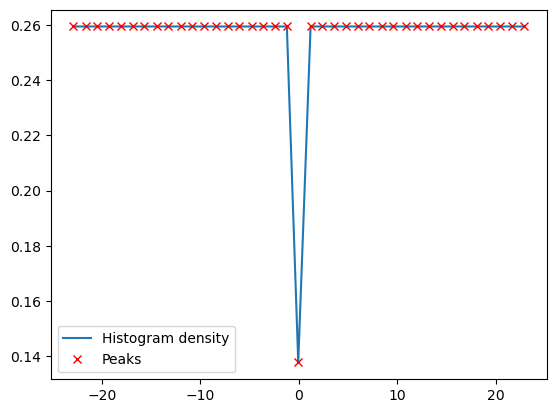

Peak positions: [-23.6822675 -22.3859777 -21.1894025 -19.8931127 -18.6965375 -17.4002477
 -16.2036725 -14.9073827 -13.7108075 -12.4145177 -11.2179425  -9.9216527
  -8.7250775  -7.4287877  -6.1324979  -4.9359227  -3.7393475  -2.4430577
  -1.2464825   0.0498073   1.2463825   2.4429577   3.7392475   4.9358227
   6.1323979   7.4286877   8.7249775   9.9215527  11.2178425  12.4144177
  13.7107075  14.9072827  16.2035725  17.4001477  18.6964375  19.8930127
  21.1893025  22.3858777  23.6821675]
Length of the array above: 39


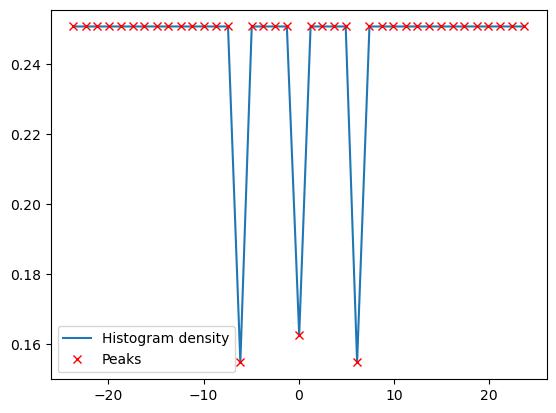

Peak positions: [-22.9881025 -21.7298091 -20.5683075 -19.3100141 -18.1485125 -16.8902191
 -15.7287175 -14.4704241 -13.3089225 -12.0506291 -10.8891275  -9.6308341
  -8.4693325  -7.2110391  -6.0495375  -4.7912441  -3.6297425  -2.3714491
  -1.2099475   0.0483459   1.2098475   2.3713491   3.6296425   4.7911441
   6.0494375   7.2109391   8.4692325   9.6307341  10.8890275  12.0505291
  13.3088225  14.4703241  15.7286175  16.8901191  18.1484125  19.3099141
  20.5682075  21.7297091  22.9880025]
Length of the array above: 39


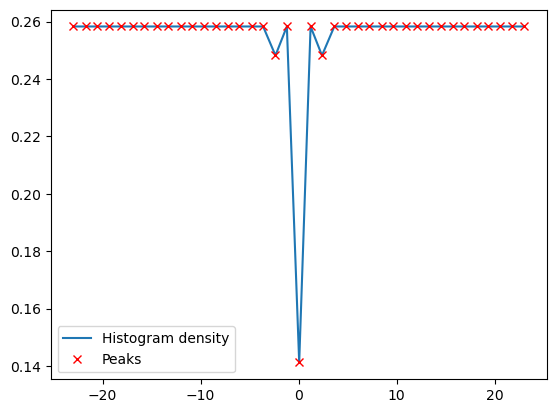

Peak positions: [-23.00919   -21.7497396 -20.58717   -19.3277196 -18.16515   -16.9056996
 -15.74313   -14.4836796 -13.32111   -12.0616596 -10.89909    -9.6396396
  -8.47707    -7.2176196  -5.9581692  -4.7955996  -3.63303    -2.3735796
  -1.21101     0.0484404   1.21101     2.3735796   3.63303     4.7955996
   5.9581692   7.2176196   8.47707     9.6396396  10.89909    12.0616596
  13.32111    14.4836796  15.74313    16.9056996  18.16515    19.3277196
  20.58717    21.7497396  23.00919  ]
Length of the array above: 39


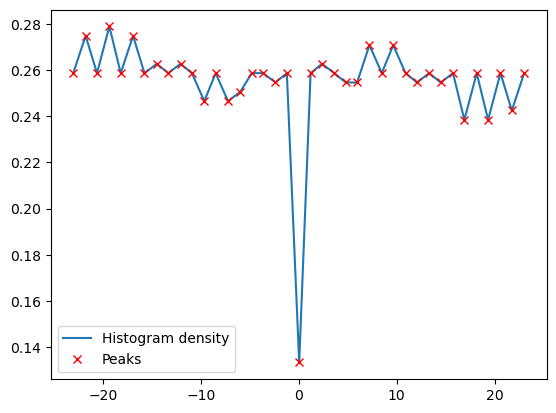

Peak positions: [-23.561805  -22.2721062 -21.081615  -19.7919162 -18.601425  -17.3117262
 -16.121235  -14.8315362 -13.641045  -12.3513462 -11.160855   -9.8711562
  -8.680665   -7.3909662  -6.200475   -4.9107762  -3.720285   -2.4305862
  -1.240095   -0.0496038   1.240095    2.4305862   3.720285    4.9107762
   6.200475    7.3909662   8.680665    9.8711562  11.160855   12.3513462
  13.641045   14.8315362  16.121235   17.3117262  18.601425   19.7919162
  21.081615   22.2721062  23.561805 ]
Length of the array above: 39


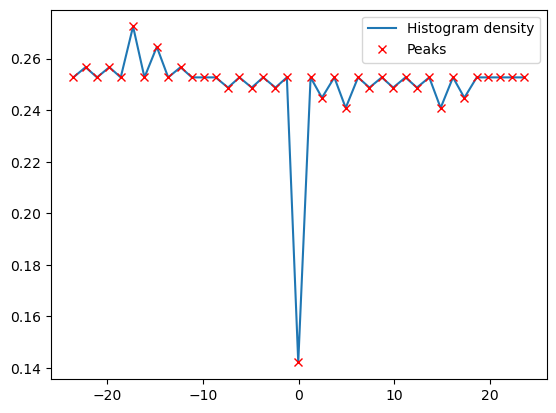

Peak positions: [-23.144375 -21.877525 -20.708125 -19.441275 -18.271875 -17.005025
 -15.835625 -14.568775 -13.399375 -12.132525 -10.963125  -9.696275
  -8.526875  -7.260025  -5.993175  -4.823775  -3.654375  -2.387525
  -1.218125  -0.048725   1.218125   2.387525   3.654375   4.823775
   5.993175   7.260025   8.526875   9.696275  10.963125  12.132525
  13.399375  14.568775  15.835625  17.005025  18.271875  19.441275
  20.708125  21.877525  23.144375]
Length of the array above: 39


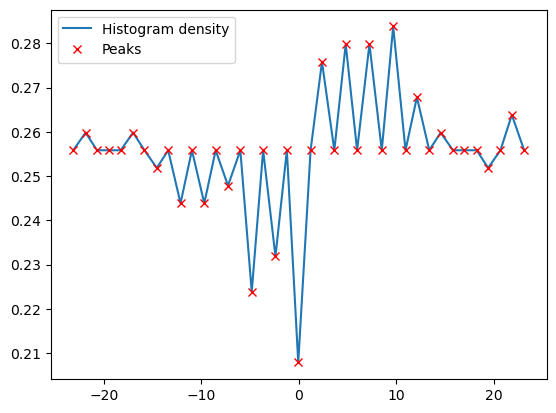

In [3]:
#We will treat column(1) as a histogram with ranges of y-values forming bins.
counts, bin_edges = np.histogram(df_sorted[1], bins=500, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#Now we're finding the peak values of column(6) in each bin
peaks, _ = find_peaks(counts, height=0, threshold=0)  
bin_centers = bin_centers[peaks]
print("Peak positions:", bin_centers)
print("Length of the array above:", len(bin_centers))
#Plotting the peaks below
plt.plot(bin_centers, counts[peaks], label="Histogram density")
plt.plot(bin_centers, counts[peaks], "rx", label="Peaks")
plt.legend()
plt.show()

counts1, bin_edges1 = np.histogram(df_sorted1[1], bins=500, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2

#Now we're finding the peak values of column(6) in each bin
peaks1, _ = find_peaks(counts1, height=0, threshold=0)  
bin_centers1 = bin_centers1[peaks1]
print("Peak positions:", bin_centers1)
print("Length of the array above:", len(bin_centers1))
#Plotting the peaks below
plt.plot(bin_centers1, counts1[peaks1], label="Histogram density")
plt.plot(bin_centers1, counts1[peaks1], "rx", label="Peaks")
plt.legend()
plt.show()

counts2, bin_edges2 = np.histogram(df_sorted2[1], bins=500, density=True)
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2

#Now we're finding the peak values of column(6) in each bin
peaks2, _ = find_peaks(counts2, height=0, threshold=0)  
bin_centers2 = bin_centers2[peaks2]
print("Peak positions:", bin_centers2)
print("Length of the array above:", len(bin_centers2))
#Plotting the peaks below
plt.plot(bin_centers2, counts2[peaks2], label="Histogram density")
plt.plot(bin_centers2, counts2[peaks2], "rx", label="Peaks")
plt.legend()
plt.show()

counts3, bin_edges3 = np.histogram(df_sorted3[1], bins=500, density=True)
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2

#Now we're finding the peak values of column(6) in each bin
peaks3, _ = find_peaks(counts3, height=0, threshold=0)  
bin_centers3 = bin_centers3[peaks3]
print("Peak positions:", bin_centers3)
print("Length of the array above:", len(bin_centers3))
#Plotting the peaks below
plt.plot(bin_centers3, counts3[peaks3], label="Histogram density")
plt.plot(bin_centers3, counts3[peaks3], "rx", label="Peaks")
plt.legend()
plt.show()

counts4, bin_edges4 = np.histogram(df_sorted4[1], bins=500, density=True)
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

#Now we're finding the peak values of column(6) in each bin
peaks4, _ = find_peaks(counts4, height=0, threshold=0)  
bin_centers4 = bin_centers4[peaks4]
print("Peak positions:", bin_centers4)
print("Length of the array above:", len(bin_centers4))
#Plotting the peaks below
plt.plot(bin_centers4, counts4[peaks4], label="Histogram density")
plt.plot(bin_centers4, counts4[peaks4], "rx", label="Peaks")
plt.legend()
plt.show()

counts5, bin_edges5 = np.histogram(df_sorted5[1], bins=500, density=True)
bin_centers5 = (bin_edges5[:-1] + bin_edges5[1:]) / 2

#Now we're finding the peak values of column(6) in each bin
peaks5, _ = find_peaks(counts5, height=0, threshold=0)  
bin_centers5 = bin_centers5[peaks5]
print("Peak positions:", bin_centers5)
print("Length of the array above:", len(bin_centers5))
#Plotting the peaks below
plt.plot(bin_centers5, counts5[peaks5], label="Histogram density")
plt.plot(bin_centers5, counts5[peaks5], "rx", label="Peaks")
plt.legend()
plt.show()

In [6]:
#Now we need to form the bins for which we will average x_B data from
bin_cutoffs=[]
for i in range(0,len(bin_centers)-1):
    bin_cutoffs.append((bin_centers[i+1]+bin_centers[i]) / 2) #This creates bin cutoffs that are centered around peaks
print("Bin cutoffs:", bin_cutoffs)
print("Length of the array above:", len(bin_cutoffs))

bin_cutoffs1=[]
for i in range(0,len(bin_centers1)-1):
    bin_cutoffs1.append((bin_centers1[i+1]+bin_centers1[i]) / 2) #This creates bin cutoffs that are centered around peaks
print("Bin cutoffs:", bin_cutoffs1)
print("Length of the array above:", len(bin_cutoffs1))

bin_cutoffs2=[]
for i in range(0,len(bin_centers2)-1):
    bin_cutoffs2.append((bin_centers2[i+1]+bin_centers2[i]) / 2) #This creates bin cutoffs that are centered around peaks
print("Bin cutoffs:", bin_cutoffs2)
print("Length of the array above:", len(bin_cutoffs2))

bin_cutoffs3=[]
for i in range(0,len(bin_centers3)-1):
    bin_cutoffs3.append((bin_centers3[i+1]+bin_centers3[i]) / 2) #This creates bin cutoffs that are centered around peaks
print("Bin cutoffs:", bin_cutoffs3)
print("Length of the array above:", len(bin_cutoffs3))

bin_cutoffs4=[]
for i in range(0,len(bin_centers4)-1):
    bin_cutoffs4.append((bin_centers4[i+1]+bin_centers4[i]) / 2) #This creates bin cutoffs that are centered around peaks
print("Bin cutoffs:", bin_cutoffs4)
print("Length of the array above:", len(bin_cutoffs4))

bin_cutoffs5=[]
for i in range(0,len(bin_centers5)-1):
    bin_cutoffs5.append((bin_centers5[i+1]+bin_centers5[i]) / 2) #This creates bin cutoffs that are centered around peaks
print("Bin cutoffs:", bin_cutoffs5)
print("Length of the array above:", len(bin_cutoffs5))

Bin cutoffs: [-22.263595199999997, -21.0588552, -19.854115200000003, -18.6493752, -17.4446352, -16.2398952, -15.035155199999998, -13.830415200000001, -12.6256752, -11.420935199999999, -10.2161952, -9.0114552, -7.806715199999999, -6.601975199999999, -5.3972352, -4.1924952, -2.9877551999999996, -1.7830151999999995, -0.6264647999999999, 0.5782752000000002, 1.7830152000000004, 2.9877551999999996, 4.1924952, 5.3972352, 6.6019752, 7.8067152, 9.0114552, 10.216195200000001, 11.420935200000002, 12.6256752, 13.830415199999997, 15.035155199999998, 16.2398952, 17.4446352, 18.6493752, 19.854115200000003, 21.0588552, 22.263595199999997]
Length of the array above: 38
Bin cutoffs: [-23.0341226, -21.7876901, -20.5412576, -19.294825099999997, -18.0483926, -16.801960100000002, -15.555527600000001, -14.3090951, -13.062662600000001, -11.8162301, -10.569797600000001, -9.323365100000002, -8.076932600000001, -6.780642800000002, -5.5342103000000025, -4.337635100000002, -3.0912026000000017, -1.8447701000000025,

In [7]:
#Using pd.cut to sort x_B values into each bin
num_bins = len(bin_cutoffs)+1
bin_labels = [f'bin_{i}' for i in range(num_bins)]

df_sorted['bins'] = pd.cut(df_sorted[1].values,
    bins=[df_sorted[1].values.min()-1, -22.263595199999997, -21.0588552, -19.854115200000003, -18.6493752, -17.4446352, -16.2398952, -15.035155199999998, -13.830415200000001, -12.6256752, -11.420935199999999, -10.2161952, -9.0114552, -7.806715199999999, -6.601975199999999, -5.3972352, -4.1924952, -2.9877551999999996, -1.7830151999999995, -0.6264647999999999, 0.5782752000000002, 1.7830152000000004, 2.9877551999999996, 4.1924952, 5.3972352, 6.6019752, 7.8067152, 9.0114552, 10.216195200000001, 11.420935200000002, 12.6256752, 13.830415199999997, 15.035155199999998, 16.2398952, 17.4446352, 18.6493752, 19.854115200000003, 21.0588552, 22.263595199999997, df_sorted[1].values.max()+1],
    labels=bin_labels,
    include_lowest=True) #Here we account create bin edges for the min and max values of column(1)

num_bins1 = len(bin_cutoffs1)+1
bin_labels1 = [f'bin_{i}' for i in range(num_bins1)]

df_sorted1['bins'] = pd.cut(df_sorted1[1].values,
    bins=[df_sorted1[1].values.min()-1, -23.0341226, -21.7876901, -20.5412576, -19.294825099999997, -18.0483926, -16.801960100000002, -15.555527600000001, -14.3090951, -13.062662600000001, -11.8162301, -10.569797600000001, -9.323365100000002, -8.076932600000001, -6.780642800000002, -5.5342103000000025, -4.337635100000002, -3.0912026000000017, -1.8447701000000025, -0.5983376000000025, 0.6480948999999976, 1.8446700999999974, 3.0911025999999975, 4.337535099999997, 5.5341102999999965, 6.780542799999997, 8.076832599999996, 9.323265099999995, 10.569697599999996, 11.816130099999995, 13.062562599999996, 14.308995099999997, 15.555427599999994, 16.801860099999995, 18.048292599999996, 19.294725099999994, 20.541157599999995, 21.787590099999996, 23.034022599999993, df_sorted[1].values.max()+1],
    labels=bin_labels1,
    include_lowest=True) #Here we account create bin edges for the min and max values of column(1)

num_bins2 = len(bin_cutoffs2)+1
bin_labels2 = [f'bin_{i}' for i in range(num_bins2)]

df_sorted2['bins'] = pd.cut(df_sorted2[1].values,
    bins=[df_sorted2[1].values.min()-1, -22.3589558, -21.1490583, -19.9391608, -18.7292633, -17.519365800000003, -16.3094683, -15.099570800000002, -13.889673300000002, -12.679775800000002, -11.469878300000001, -10.259980800000001, -9.0500833, -7.8401858, -6.630288300000001, -5.420390800000001, -4.2104933, -3.000595800000001, -1.7906983000000016, -0.5808008000000013, 0.629096699999999, 1.7905982999999992, 3.0004957999999995, 4.210393299999999, 5.420290799999998, 6.630188299999999, 7.8400858, 9.0499833, 10.2598808, 11.4697783, 12.679675799999998, 13.889573299999999, 15.099470799999999, 16.309368299999996, 17.5192658, 18.729163299999996, 19.939060799999996, 21.148958299999997, 22.358855799999997, df_sorted[1].values.max()+1],
    labels=bin_labels2,
    include_lowest=True) #Here we account create bin edges for the min and max values of column(1)

num_bins3 = len(bin_cutoffs3)+1
bin_labels3 = [f'bin_{i}' for i in range(num_bins3)]

df_sorted3['bins'] = pd.cut(df_sorted3[1].values,
    bins=[df_sorted3[1].values.min()-1, -22.379464799999997, -21.1684548, -19.957444799999998, -18.7464348, -17.5354248, -16.3244148, -15.1134048, -13.9023948, -12.6913848, -11.4803748, -10.2693648, -9.0583548, -7.847344800000001, -6.587894400000001, -5.376884400000001, -4.214314800000001, -3.0033048000000013, -1.7922948000000014, -0.5812848000000015, 0.6297251999999984, 1.7922947999999987, 3.0033047999999987, 4.214314799999999, 5.376884399999999, 6.587894399999999, 7.847344799999998, 9.058354799999998, 10.269364799999998, 11.480374799999996, 12.691384799999996, 13.902394799999998, 15.113404799999998, 16.324414799999996, 17.535424799999994, 18.746434799999996, 19.957444799999998, 21.168454799999996, 22.379464799999994, df_sorted[1].values.max()+1],
    labels=bin_labels3,
    include_lowest=True) #Here we account create bin edges for the min and max values of column(1)

num_bins4 = len(bin_cutoffs4)+1
bin_labels4 = [f'bin_{i}' for i in range(num_bins4)]

df_sorted4['bins'] = pd.cut(df_sorted4[1].values,
    bins=[df_sorted4[1].values.min()-1, -22.9169556, -21.676860599999998, -20.4367656, -19.196670599999997, -17.9565756, -16.7164806, -15.4763856, -14.2362906, -12.9961956, -11.7561006, -10.516005600000002, -9.275910600000001, -8.035815600000001, -6.795720600000001, -5.555625600000001, -4.315530600000001, -3.0754356000000005, -1.8353406000000003, -0.6448494000000009, 0.5952455999999984, 1.8353405999999977, 3.075435599999997, 4.315530599999997, 5.555625599999997, 6.7957205999999974, 8.0358156, 9.2759106, 10.516005599999996, 11.756100599999996, 12.996195599999997, 14.236290599999997, 15.476385599999997, 16.716480599999997, 17.956575599999997, 19.196670599999997, 20.436765599999998, 21.676860599999998, 22.916955599999998, df_sorted[1].values.max()+1],
    labels=bin_labels4,
    include_lowest=True) #Here we account create bin edges for the min and max values of column(1

num_bins5 = len(bin_cutoffs5)+1
bin_labels5 = [f'bin_{i}' for i in range(num_bins5)]

df_sorted5['bins'] = pd.cut(df_sorted5[1].values,
    bins=[df_sorted5[1].values.min()-1, -22.51095, -21.292825, -20.0747, -18.856575, -17.63845, -16.420325, -15.2022, -13.984074999999999, -12.76595, -11.547825, -10.329699999999999, -9.111575, -7.89345, -6.626599999999999, -5.408474999999999, -4.239074999999999, -3.0209499999999982, -1.8028249999999986, -0.633424999999999, 0.5847000000000016, 1.8028250000000021, 3.020950000000002, 4.2390750000000015, 5.408475000000002, 6.6266000000000025, 7.893450000000003, 9.111575000000002, 10.3297, 11.547825000000001, 12.765950000000002, 13.984075000000002, 15.202200000000003, 16.420325000000005, 17.638450000000002, 18.856575000000003, 20.074700000000004, 21.292825000000004, 22.510950000000005, df_sorted[1].values.max()+1],
    labels=bin_labels5,
    include_lowest=True) #Here we account create bin edges for the min and max values of column(1)

In [8]:
#Calculate mean values for each bin
grouped = df_sorted.groupby('bins')
mean_col1 = bin_centers
mean_col6 = grouped[6].mean()  #Mean of the atomic molar fraction values for each bin

grouped1 = df_sorted1.groupby('bins')
mean_col11 = bin_centers1
mean_col61 = grouped1[6].mean()  #Mean of the atomic molar fraction values for each bin

grouped2 = df_sorted2.groupby('bins')
mean_col12 = bin_centers2
mean_col62 = grouped2[6].mean()  #Mean of the atomic molar fraction values for each bin

grouped3 = df_sorted3.groupby('bins')
mean_col13 = bin_centers3
mean_col63 = grouped3[6].mean()  #Mean of the atomic molar fraction values for each bin

grouped4 = df_sorted4.groupby('bins')
mean_col14 = bin_centers4
mean_col64 = grouped4[6].mean()  #Mean of the atomic molar fraction values for each bin

grouped5 = df_sorted5.groupby('bins')
mean_col15 = bin_centers5
mean_col65 = grouped5[6].mean()  #Mean of the atomic molar fraction values for each bin

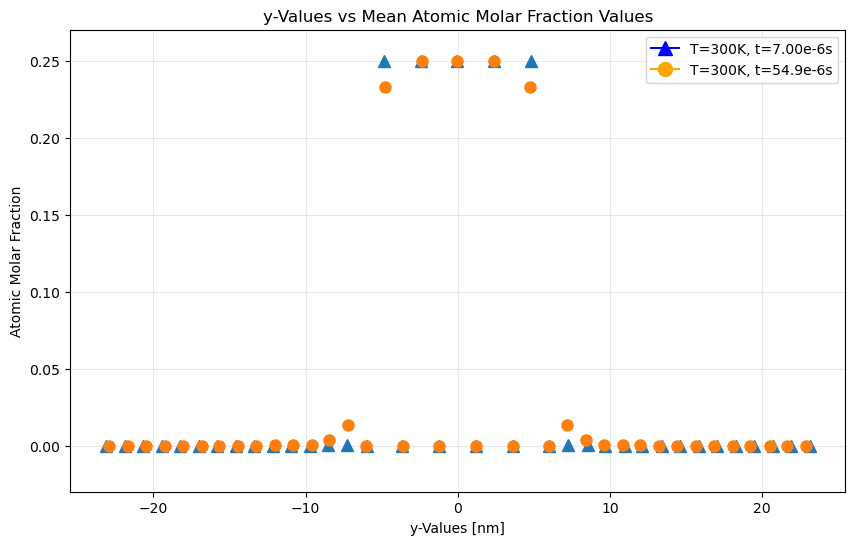

In [9]:
plt.figure(figsize=(10, 6))

#T800K1 = plt.plot(mean_col11, mean_col61, marker='^', linewidth=0, markersize=8)
#T800K38 = plt.plot(mean_col12, mean_col62, marker='o', linewidth=0, markersize=8)
#T700K1 = plt.plot(mean_col13, mean_col63, marker='^', linewidth=0, markersize=8)
#T700K38 = plt.plot(mean_col14, mean_col64, marker='o', linewidth=0, markersize=8)
T300K1 = plt.plot(mean_col15, mean_col65, marker='^', linewidth=0, markersize=8)
T300K38 = plt.plot(mean_col1, mean_col6, marker='o', linewidth=0, markersize=8)
plt.xlabel('y-Values [nm]')
plt.ylabel('Atomic Molar Fraction')
plt.ylim(-0.03, 0.27)
plt.title(f'y-Values vs Mean Atomic Molar Fraction Values')
plt.grid(True, alpha=0.3)

legend_elements = [
    Line2D([0], [0], marker='^', color='b', label='T=300K, t=7.00e-6s', markersize=10),
    Line2D([0], [0], marker='o', color='orange', label='T=300K, t=54.9e-6s', markersize=10)]
plt.legend(handles=legend_elements)
plt.show()
